<a href="https://colab.research.google.com/github/RakhaFS/AMS/blob/main/Case_Study_01_AMS_in_Government_Kelompok_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen dan Tanggapan Publik di Media Sosial terhadap Vasektomi untuk Mengatasi Kemiskinan**

# **DATA UNDERSTANDING**

## **Import Data**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [ ]:
# URL CSV dari GitHub (raw version)
url = "https://raw.githubusercontent.com/MuhammadAnthar/Sentiment-Analysis/main/komentar_youtube_vasektomi_bansos.csv"
# Baca CSV
data = pd.read_csv(url)
# Tampilkan 5 baris secara random
data.sample(5)

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling
3927,VXdCZ9bptes,@sandivariasi825,Semua para Mentri di bikin goyah sm KDM supaya...,2025-05-04T07:19:37Z,8,vasektomi bansos,Jawab Dedi Mulyadi soal MUI Haramkan Vasektomi...,1.0
1853,kdntbrfFoXI,@SamsungA1361,"Angel kalo.didkit""d kaitkan ham d negri ini",2025-05-10T06:37:52Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0
2024,kdntbrfFoXI,@LaluDarwis,Orang tua yg tidak bisa memenuhi kebutuhan kel...,2025-05-07T22:54:58Z,1,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0
1738,kdntbrfFoXI,@indrakd3335,HAM terus yg di bicarakan tp kalian sendiri yg...,2025-05-11T13:57:22Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0
3911,tW-kXQBDbfI,@thiamhaptjhang6090,Kalau menurut ente haram ya nggak usah dijalan...,2025-05-04T05:49:02Z,0,vasektomi keluarga miskin,Respons Dedi Mulyadi Soal Fatwa MUI Jabar yang...,2.0


In [ ]:
data.drop_duplicates(subset="text", keep = 'first',  inplace = True)

In [ ]:
data['text'].isnull().sum()

np.int64(0)

# **PREPROCESSING**

##**CLEANING TEXT**



Di bawah ini terdapat beberapa fungsi untuk membersihkan teks dari elemen-elemen yang tidak diinginkan, seperti URL, tag HTML, emoji, username, angka, dan simbol. Proses pembersihan ini bertujuan untuk menghasilkan teks yang lebih bersih dan relevan untuk analisis lebih lanjut.

In [ ]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet


In [ ]:
# Visualisasi clean dataset 'full_text'
data['cleaning'] = data['text'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_username(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))
data.head(10)

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,Wenak itu masih bisa enak enak tapi nggak puny...
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,Sebentar Bansos tu wajib dpt setiap org atau b...
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,Tergantung dari ybs mau gaknya gitu aja kok repot
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,Program vasektomii sejak saya menjadi nakes d...
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,Tuh dokter boyke aja bilang aman lanjutkan sol...
5,01VzjUUJjkk,@taufikhidayah1787,Kenapa ya Rakyat kecil selalu jadi kambing hit...,2025-05-07T15:26:57Z,0,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",3.0,Kenapa ya Rakyat kecil selalu jadi kambing hit...
6,kdntbrfFoXI,@dedisetiawan3688,ini orang HAM gada lagi? KERJA WOI dahmah bele...,2025-05-08T07:39:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,ini orang HAM gada lagi KERJA WOI dahmah belet...
7,01VzjUUJjkk,@adisuwito6686,"MUI udah bener tidur,sekali gerak malah jegal ...",2025-05-02T17:33:16Z,1,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",1.0,MUI udah bener tidursekali gerak malah jegal p...
8,kdntbrfFoXI,@NurHayati-x2q2o,Maap buk coba bikin konten seperti kd. Biar ka...,2025-05-08T05:57:32Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,Maap buk coba bikin konten seperti kd Biar kam...
9,MX3EsyJNIAU,@serinchy333real9,Yg divasektomi tuh yg sdh pny anak.. maaalllii...,2025-05-02T01:47:38Z,0,vasektomi dedi mulyadi,Komentar Masyarakat Soal Pernyataan Dedi Mulya...,3.0,Yg divasektomi tuh yg sdh pny anak maaallliiii...


In [ ]:
def replace_slang(text, slang_dict):
    # Pastikan string, lowercase, dan hilangkan tanda baca
    text = str(text).lower().translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    cleaned_words = [slang_dict.get(word, word) for word in words]
    return " ".join(cleaned_words)

In [ ]:
url = "https://raw.githubusercontent.com/MuhammadAnthar/Sentiment-Analysis/main/slang_vasektomi.txt"
slang_data = pd.read_csv(url, sep=":", header=None, names=["slang", "formal"])

slang_dict = slang_data.set_index("slang")["formal"].to_dict()

slang_data = pd.read_csv(url, sep="=", header=None, names=["slang", "formal"])
slang_data["slang"] = slang_data["slang"].str.lower().str.strip()
slang_data["formal"] = slang_data["formal"].str.strip()
slang_dict = slang_data.set_index("slang")["formal"].to_dict()

    # Terapkan slang replacement ke kolom 'cleaning'
data["cleaning_cleaned"] = data["cleaning"].apply(lambda x: replace_slang(x, slang_dict))
data.drop("cleaning", axis=1, inplace=True)
data.head(10)

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning_cleaned
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,enak itu masih bisa enak enak tapi tidak punya...
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,sebentar bantuan sosial itu wajib dapat setiap...
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,tergantung dari yang bersangkutan mau gaknya g...
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,program vasektomii sejak saya menjadi nakes di...
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,tuh dokter boyke saja bilang aman lanjutkan so...
5,01VzjUUJjkk,@taufikhidayah1787,Kenapa ya Rakyat kecil selalu jadi kambing hit...,2025-05-07T15:26:57Z,0,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",3.0,kenapa iya rakyat kecil selalu jadi kambing hi...
6,kdntbrfFoXI,@dedisetiawan3688,ini orang HAM gada lagi? KERJA WOI dahmah bele...,2025-05-08T07:39:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,ini orang ham tidak ada lagi kerja woi dahmah ...
7,01VzjUUJjkk,@adisuwito6686,"MUI udah bener tidur,sekali gerak malah jegal ...",2025-05-02T17:33:16Z,1,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",1.0,MUI sudah bener tidursekali gerak malah jegal ...
8,kdntbrfFoXI,@NurHayati-x2q2o,Maap buk coba bikin konten seperti kd. Biar ka...,2025-05-08T05:57:32Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,maap buk coba buat konten seperti kd agar kami...
9,MX3EsyJNIAU,@serinchy333real9,Yg divasektomi tuh yg sdh pny anak.. maaalllii...,2025-05-02T01:47:38Z,0,vasektomi dedi mulyadi,Komentar Masyarakat Soal Pernyataan Dedi Mulya...,3.0,yang vasektomi tuh yang sudah punya anak maaal...



##**CASE FOLDING**







Csse Folding merupakan proses mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan dari case folding adalah untuk mengurangi variasi kata yang disebabkan oleh perbedaan penggunaan huruf besar dan kecil. Dengan melakukan case folding, kita dapat memastikan bahwa kata-kata yang sama, meskipun ditulis dengan kombinasi huruf besar dan kecil yang berbeda, akan dianggap identik.

In [ ]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
data['case_folding'] = data['cleaning_cleaned'].apply(case_folding)

data.head(10)

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning_cleaned,case_folding
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,enak itu masih bisa enak enak tapi tidak punya...,enak itu masih bisa enak enak tapi tidak punya...
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,sebentar bantuan sosial itu wajib dapat setiap...,sebentar bantuan sosial itu wajib dapat setiap...
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,tergantung dari yang bersangkutan mau gaknya g...,tergantung dari yang bersangkutan mau gaknya g...
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,program vasektomii sejak saya menjadi nakes di...,program vasektomii sejak saya menjadi nakes di...
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,tuh dokter boyke saja bilang aman lanjutkan so...,tuh dokter boyke saja bilang aman lanjutkan so...
5,01VzjUUJjkk,@taufikhidayah1787,Kenapa ya Rakyat kecil selalu jadi kambing hit...,2025-05-07T15:26:57Z,0,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",3.0,kenapa iya rakyat kecil selalu jadi kambing hi...,kenapa iya rakyat kecil selalu jadi kambing hi...
6,kdntbrfFoXI,@dedisetiawan3688,ini orang HAM gada lagi? KERJA WOI dahmah bele...,2025-05-08T07:39:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,ini orang ham tidak ada lagi kerja woi dahmah ...,ini orang ham tidak ada lagi kerja woi dahmah ...
7,01VzjUUJjkk,@adisuwito6686,"MUI udah bener tidur,sekali gerak malah jegal ...",2025-05-02T17:33:16Z,1,vasektomi dedi mulyadi,"Tanggapi Rencana KB Vasektomi Dedi Mulyadi, MU...",1.0,MUI sudah bener tidursekali gerak malah jegal ...,mui sudah bener tidursekali gerak malah jegal ...
8,kdntbrfFoXI,@NurHayati-x2q2o,Maap buk coba bikin konten seperti kd. Biar ka...,2025-05-08T05:57:32Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,maap buk coba buat konten seperti kd agar kami...,maap buk coba buat konten seperti kd agar kami...
9,MX3EsyJNIAU,@serinchy333real9,Yg divasektomi tuh yg sdh pny anak.. maaalllii...,2025-05-02T01:47:38Z,0,vasektomi dedi mulyadi,Komentar Masyarakat Soal Pernyataan Dedi Mulya...,3.0,yang vasektomi tuh yang sudah punya anak maaal...,yang vasektomi tuh yang sudah punya anak maaal...


## **TOKENIZE**

Tokenize merupakan proses membagi teks menjadi unit-unit yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bahkan karakter. Tujuan dari tokenisasi adalah untuk memudahkan pemrosesan dan analisis teks dengan memecahnya menjadi bagian-bagian yang lebih terstruktur dan mudah diolah.

In [ ]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
data['tokenize'] = data['case_folding'].apply(tokenize)
data

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning_cleaned,case_folding,tokenize
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,enak itu masih bisa enak enak tapi tidak punya...,enak itu masih bisa enak enak tapi tidak punya...,"[enak, itu, masih, bisa, enak, enak, tapi, tid..."
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,sebentar bantuan sosial itu wajib dapat setiap...,sebentar bantuan sosial itu wajib dapat setiap...,"[sebentar, bantuan, sosial, itu, wajib, dapat,..."
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,tergantung dari yang bersangkutan mau gaknya g...,tergantung dari yang bersangkutan mau gaknya g...,"[tergantung, dari, yang, bersangkutan, mau, ga..."
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,program vasektomii sejak saya menjadi nakes di...,program vasektomii sejak saya menjadi nakes di...,"[program, vasektomii, sejak, saya, menjadi, na..."
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,tuh dokter boyke saja bilang aman lanjutkan so...,tuh dokter boyke saja bilang aman lanjutkan so...,"[tuh, dokter, boyke, saja, bilang, aman, lanju..."
...,...,...,...,...,...,...,...,...,...,...,...
5933,XZz_wbi_Lfg,@endiputra4236,"vasektomi, malah mendahului Allah swt. padahal...",2025-05-09T12:28:57Z,1,vasektomi bansos,Dedi Mulyadi Usul Vasektomi Jadi Syarat Bansos...,3.0,vasektomi malah mendahului allah swt padahal m...,vasektomi malah mendahului allah swt padahal m...,"[vasektomi, malah, mendahului, allah, swt, pad..."
5934,kdntbrfFoXI,@agusdimas8863,Bebas buang saham kemana mana 😂,2025-05-08T04:42:27Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,bebas buang saham kemana mana,bebas buang saham kemana mana,"[bebas, buang, saham, kemana, mana]"
5935,kdntbrfFoXI,@feniresianti5025,Kehamilan dan melahirkan itu mempertaruhkan ny...,2025-05-07T23:02:49Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,kehamilan dan melahirkan itu mempertaruhkan ny...,kehamilan dan melahirkan itu mempertaruhkan ny...,"[kehamilan, dan, melahirkan, itu, mempertaruhk..."
5936,kdntbrfFoXI,@HYPERSONICTOW,"Logika KDM itu benar, hanya bisa difahami oran...",2025-05-12T20:44:26Z,1,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,logika dedi mulyadi itu benar hanya bisa difah...,logika dedi mulyadi itu benar hanya bisa difah...,"[logika, dedi, mulyadi, itu, benar, hanya, bis..."


##**STOPWORD REMOVAL**

Stopword Removal adalah proses penghapusan kata-kata umum yang tidak memiliki banyak makna dalam analisis teks. Kata-kata ini, yang dikenal sebagai stopword, sering muncul dalam teks tetapi biasanya tidak memberikan kontribusi signifikan terhadap pemahaman atau analisis konteks. Contoh stopword dalam bahasa Indonesia meliputi kata-kata seperti "dan", "yang", "adalah", "di", "ke", "dari", dan sebagainya.

In [ ]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/MuhammadAnthar/Sentiment-Analysis/main/Stopword_Vasektomi.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
data['stopword_removal'] = data['tokenize'].apply(remove_stopwords)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning_cleaned,case_folding,tokenize,stopword_removal
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,enak itu masih bisa enak enak tapi tidak punya...,enak itu masih bisa enak enak tapi tidak punya...,"[enak, itu, masih, bisa, enak, enak, tapi, tid...","[enak, enak, enak, anak]"
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,sebentar bantuan sosial itu wajib dapat setiap...,sebentar bantuan sosial itu wajib dapat setiap...,"[sebentar, bantuan, sosial, itu, wajib, dapat,...","[sebentar, bantuan, sosial, wajib, org, milih,..."
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,tergantung dari yang bersangkutan mau gaknya g...,tergantung dari yang bersangkutan mau gaknya g...,"[tergantung, dari, yang, bersangkutan, mau, ga...","[tergantung, bersangkutan, repot]"
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,program vasektomii sejak saya menjadi nakes di...,program vasektomii sejak saya menjadi nakes di...,"[program, vasektomii, sejak, saya, menjadi, na...","[program, vasektomii, nakes, desa, disebarkan,..."
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,tuh dokter boyke saja bilang aman lanjutkan so...,tuh dokter boyke saja bilang aman lanjutkan so...,"[tuh, dokter, boyke, saja, bilang, aman, lanju...","[dokter, boyke, aman, solusinya, dedi, mulyadi]"
...,...,...,...,...,...,...,...,...,...,...,...,...
5933,XZz_wbi_Lfg,@endiputra4236,"vasektomi, malah mendahului Allah swt. padahal...",2025-05-09T12:28:57Z,1,vasektomi bansos,Dedi Mulyadi Usul Vasektomi Jadi Syarat Bansos...,3.0,vasektomi malah mendahului allah swt padahal m...,vasektomi malah mendahului allah swt padahal m...,"[vasektomi, malah, mendahului, allah, swt, pad...","[vasektomi, mendahului, allah, swt, anaknya, m..."
5934,kdntbrfFoXI,@agusdimas8863,Bebas buang saham kemana mana 😂,2025-05-08T04:42:27Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,bebas buang saham kemana mana,bebas buang saham kemana mana,"[bebas, buang, saham, kemana, mana]","[bebas, buang, saham]"
5935,kdntbrfFoXI,@feniresianti5025,Kehamilan dan melahirkan itu mempertaruhkan ny...,2025-05-07T23:02:49Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,kehamilan dan melahirkan itu mempertaruhkan ny...,kehamilan dan melahirkan itu mempertaruhkan ny...,"[kehamilan, dan, melahirkan, itu, mempertaruhk...","[kehamilan, melahirkan, mempertaruhkan, nyawa,..."
5936,kdntbrfFoXI,@HYPERSONICTOW,"Logika KDM itu benar, hanya bisa difahami oran...",2025-05-12T20:44:26Z,1,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,logika dedi mulyadi itu benar hanya bisa difah...,logika dedi mulyadi itu benar hanya bisa difah...,"[logika, dedi, mulyadi, itu, benar, hanya, bis...","[logika, dedi, mulyadi, difahami, orang, cerdas]"


##**STEMMING**

Stemming adalah proses mengubah kata-kata dalam teks menjadi bentuk dasarnya (root form). Tujuan dari stemming adalah untuk mengurangi variasi kata yang berasal dari perubahan bentuk kata yang berbeda (misalnya, perubahan bentuk kata kerja atau kata benda) sehingga kata-kata dengan makna yang sama dapat dianggap sebagai entitas yang serupa

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat stemmer menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# Fungsi stemming untuk setiap token
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Menambahkan kolom baru untuk hasil stemming
data["stemmed"] = data["stopword_removal"].apply(stem_words)
data

,videoId,author,text,publishedAt,likeCount,search_keyword,video_title,labelling,cleaning_cleaned,case_folding,tokenize,stopword_removal,stemmed
0,kdntbrfFoXI,@darularifin6184,Wenak itu masih bisa enak enak tapi nggak puny...,2025-05-12T03:22:00Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,enak itu masih bisa enak enak tapi tidak punya...,enak itu masih bisa enak enak tapi tidak punya...,"[enak, itu, masih, bisa, enak, enak, tapi, tid...","[enak, enak, enak, anak]","[enak, enak, enak, anak]"
1,kdntbrfFoXI,@FerlianSatria,Sebentar. Bansos tu wajib dpt setiap org atau ...,2025-05-10T02:51:02Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,sebentar bantuan sosial itu wajib dapat setiap...,sebentar bantuan sosial itu wajib dapat setiap...,"[sebentar, bantuan, sosial, itu, wajib, dapat,...","[sebentar, bantuan, sosial, wajib, org, milih,...","[sebentar, bantu, sosial, wajib, org, milih, n..."
2,kdntbrfFoXI,@edisantoso8550,"Tergantung dari ybs mau gaknya, gitu aja kok r...",2025-05-09T06:03:55Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,tergantung dari yang bersangkutan mau gaknya g...,tergantung dari yang bersangkutan mau gaknya g...,"[tergantung, dari, yang, bersangkutan, mau, ga...","[tergantung, bersangkutan, repot]","[gantung, sangkut, repot]"
3,kdntbrfFoXI,@hjodahrosdiana8441,Program vasektomii sejak saya menjadi nakes d...,2025-05-10T13:34:17Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,2.0,program vasektomii sejak saya menjadi nakes di...,program vasektomii sejak saya menjadi nakes di...,"[program, vasektomii, sejak, saya, menjadi, na...","[program, vasektomii, nakes, desa, disebarkan,...","[program, vasektomi, nakes, desa, sebar, perin..."
4,kdntbrfFoXI,@trinoviepurwaningsih3065,"Tuh dokter boyke aja bilang aman, lanjutkan so...",2025-05-08T02:11:51Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,tuh dokter boyke saja bilang aman lanjutkan so...,tuh dokter boyke saja bilang aman lanjutkan so...,"[tuh, dokter, boyke, saja, bilang, aman, lanju...","[dokter, boyke, aman, solusinya, dedi, mulyadi]","[dokter, boyke, aman, solusi, dedi, mulyadi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,XZz_wbi_Lfg,@endiputra4236,"vasektomi, malah mendahului Allah swt. padahal...",2025-05-09T12:28:57Z,1,vasektomi bansos,Dedi Mulyadi Usul Vasektomi Jadi Syarat Bansos...,3.0,vasektomi malah mendahului allah swt padahal m...,vasektomi malah mendahului allah swt padahal m...,"[vasektomi, malah, mendahului, allah, swt, pad...","[vasektomi, mendahului, allah, swt, anaknya, m...","[vasektomi, dahulu, allah, swt, anak, tinggal,..."
5934,kdntbrfFoXI,@agusdimas8863,Bebas buang saham kemana mana 😂,2025-05-08T04:42:27Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,3.0,bebas buang saham kemana mana,bebas buang saham kemana mana,"[bebas, buang, saham, kemana, mana]","[bebas, buang, saham]","[bebas, buang, saham]"
5935,kdntbrfFoXI,@feniresianti5025,Kehamilan dan melahirkan itu mempertaruhkan ny...,2025-05-07T23:02:49Z,0,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,kehamilan dan melahirkan itu mempertaruhkan ny...,kehamilan dan melahirkan itu mempertaruhkan ny...,"[kehamilan, dan, melahirkan, itu, mempertaruhk...","[kehamilan, melahirkan, mempertaruhkan, nyawa,...","[hamil, lahir, taruh, nyawa, meni, dasar, cint..."
5936,kdntbrfFoXI,@HYPERSONICTOW,"Logika KDM itu benar, hanya bisa difahami oran...",2025-05-12T20:44:26Z,1,vasektomi jawa barat,Kata Dokter Boyke soal Wacana Vasektomi di Jaw...,1.0,logika dedi mulyadi itu benar hanya bisa difah...,logika dedi mulyadi itu benar hanya bisa difah...,"[logika, dedi, mulyadi, itu, benar, hanya, bis...","[logika, dedi, mulyadi, difahami, orang, cerdas]","[logika, dedi, mulyadi, difahami, orang, cerdas]"


# **Sentiment Analysist**

#**WordCloud**

In [ ]:
# Buat DataFrame baru untuk label positif dan negatif
df_negatif = data[data['labelling'] == 1]
df_positif = data[data['labelling'] == 3]

###**Positif**

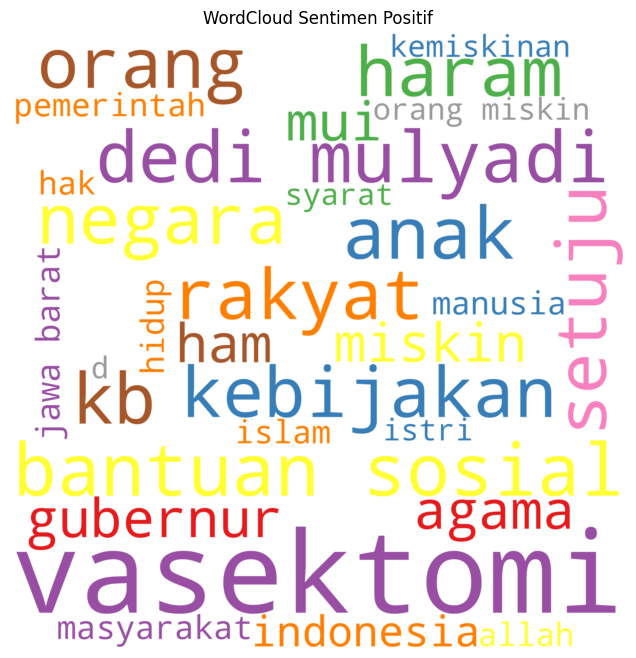

In [ ]:
from wordcloud import WordCloud # Import the WordCloud class
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df1
all_text_s2 = ' '.join(word for word in df_positif['stopword_removal'].astype(str))

# Menghapus tanda apostrof (') menggunakan regex
cleaned_text = re.sub(r"'", "", all_text_s2)

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.05,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    max_words=30             # Set limitasi kata
).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

Interpretasi

- Kata seperti “kebijakan”, “bantuan sosial”, “negara”, dan “rakyat” menunjukkan bahwa wacana mengenai vasektomi tidak berdiri sendiri sebagai isu medis atau pribadi, melainkan menjadi bagian dari strategi negara dalam mengentaskan kemiskinan dan memperbaiki kualitas hidup warga.

- Menariknya, munculnya kata “setuju”, “hidup”, dan “manusia” memperkuat kesan bahwa program ini dipandang sebagai bentuk penghormatan terhadap kehidupan itu sendiri — yakni dengan cara mengatur keluarga secara sadar demi masa depan yang lebih layak.

- Nama “Dedi Mulyadi” yang cukup dominan dalam wordcloud ini memberi sinyal bahwa publik merespons positif figur yang dianggap berani, progresif, dan dekat dengan isu rakyat kecil. Sosok ini tampaknya berhasil mengangkat isu vasektomi ke ranah publik tanpa menimbulkan resistensi besar.

- Kehadiran kata “MUI”, “agama”, dan “Islam” di dalam konteks positif juga menunjukkan bahwa isu reproduksi dan pengendalian penduduk sudah mulai mendapat tempat dalam wacana keagamaan secara lebih terbuka dan konstruktif. Ini menunjukkan bahwa pendekatan kolaboratif antara negara dan lembaga agama mulai efektif membangun narasi yang tidak saling bertentangan.

- Hal menarik lainnya adalah kemunculan kata “anak”, “istri”, dan “keluarga”, yang memperlihatkan bahwa publik tidak hanya memikirkan efek kebijakan ini secara individual, tapi juga dampaknya terhadap struktur sosial dan hubungan antaranggota keluarga.



###**Negatif**

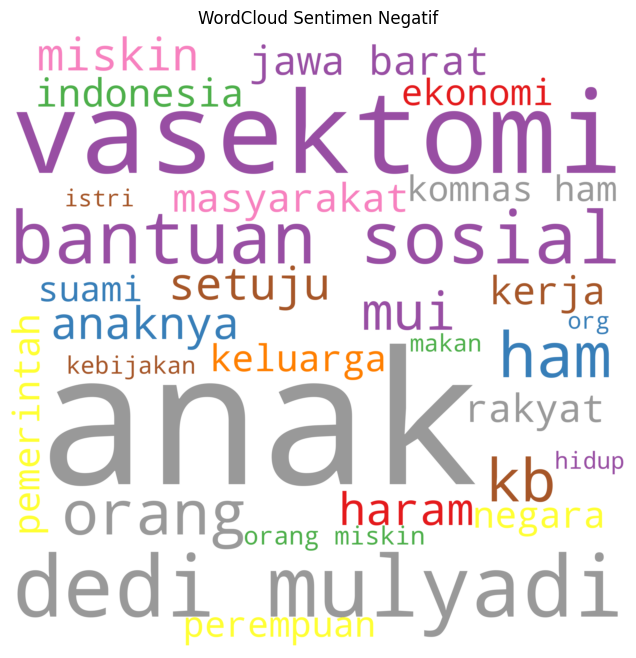

In [ ]:
all_text_s2 = ' '.join(word for word in df_negatif['stopword_removal'].astype(str))

# Menghapus tanda apostrof (') menggunakan regex
cleaned_text = re.sub(r"'", "", all_text_s2)

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    max_words=30             # Set limitasi kata
).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

Interpretasi

- Isu ini bukan hanya soal medis, tapi sangat kuat dipengaruhi oleh dimensi etika, agama, dan keadilan sosial.

- Banyak komentar negatif memandang vasektomi sebagai bentuk kontrol terhadap masyarakat miskin, yang bisa dianggap melanggar hak asasi manusia.

- Terdapat penolakan dari sisi agama dan budaya, dengan kemunculan kata seperti “haram”, “MUI”, dan “HAM”.

- Tokoh seperti “Dedi Mulyadi” disebutkan berulang, menunjukkan bahwa opini publik juga terarah pada aktor politik tertentu, bukan hanya kebijakan.

- Potensi dampak jangka panjang terhadap keluarga dan keturunan menjadi kekhawatiran utama netizen.

In [ ]:
data = data.dropna(subset=["labelling"])

# Konversi ke integer
data["labelling"] = data["labelling"].astype(int)

# Drop yang labelling == 0
data = data[data["labelling"] != 0]

# Pisahkan berdasarkan label
pos = data[data["labelling"] == 1]
neg = data[data["labelling"] == 3]
net = data[data["labelling"] == 2]

# Agregasi per author
agg_pos = pos.groupby("author").agg(
    pos_count=("labelling", "count"),
    pos_likes=("likeCount", "sum")
)

agg_neg = neg.groupby("author").agg(
    neg_count=("labelling", "count"),
    neg_likes=("likeCount", "sum")
)

agg_net = net.groupby("author").agg(
    net_count=("labelling", "count"),
    net_likes=("likeCount", "sum")
)

# Gabungkan semua agregasi
author_summary = agg_pos.join([agg_neg, agg_net], how="outer").fillna(0).astype(int)

# Lihat hasil akhir
author_summary


,pos_count,pos_likes,neg_count,neg_likes,net_count,net_likes
author,,,,,,
@110400083,1,0,0,0,0,0
@1357erwin,1,15,0,0,0,0
@2205Richard,1,0,0,0,0,0
@2_rafifsandhiaafandhita558,1,131,1,0,0,0
@4HLike,1,0,0,0,0,0
...,...,...,...,...,...,...
@zerostarB,0,0,0,0,1,0
@ziaz-s2x,0,0,0,0,1,0
@zulfana5623,0,0,0,0,1,0


# **Distribusi Sentimen**

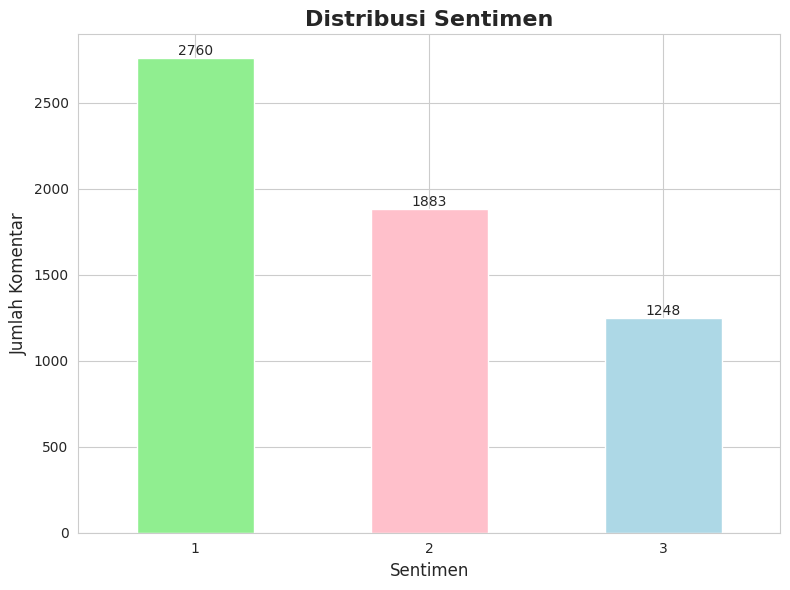

In [ ]:
# Membuat grafik batang dengan nilai di atasnya
ax = data['labelling'].value_counts().plot(
    kind='bar',
    color=['lightgreen', 'pink', 'lightblue'],
    figsize=(8, 6)
)

# Menambahkan judul dan label
plt.title('Distribusi Sentimen', fontsize=16, weight='bold')
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# Menambahkan nilai di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Interpretasi

- **Sentimen Positif Mendominasi**
  
  Komentar dengan sentimen positif memiliki proporsi terbesar, yaitu lebih dari 40% dari total komentar. Ini menunjukkan bahwa respon publik cenderung mendukung kebijakan atau topik yang dibahas, yang kemungkinan berkaitan dengan program vasektomi, pengendalian penduduk, atau bantuan sosial.

- **Tingginya Sentimen Netral**
  
  Terdapat 1.883 komentar netral, menandakan bahwa sebagian masyarakat belum mengambil sikap tegas, atau memberikan komentar informatif, deskriptif, atau datar secara emosional.
  Ini bisa menjadi indikasi adanya ruang diskusi yang terbuka, di mana publik masih dalam tahap memahami isu atau menunggu klarifikasi lebih lanjut dari pemerintah/tokoh terkait.

- **Sentimen Negatif Paling Sedikit**
  
  Meskipun topiknya sensitif (misalnya vasektomi), jumlah komentar negatif relatif rendah (1.248). Hal ini bisa mengindikasikan bahwa resistensi terhadap isu ini tidak terlalu besar, atau bahwa strategi komunikasi kebijakan berhasil meredam potensi konflik sosial dan kultural.



# **Top 10 Pengguna dengan Like Terbanyak pada Komentar Positif**

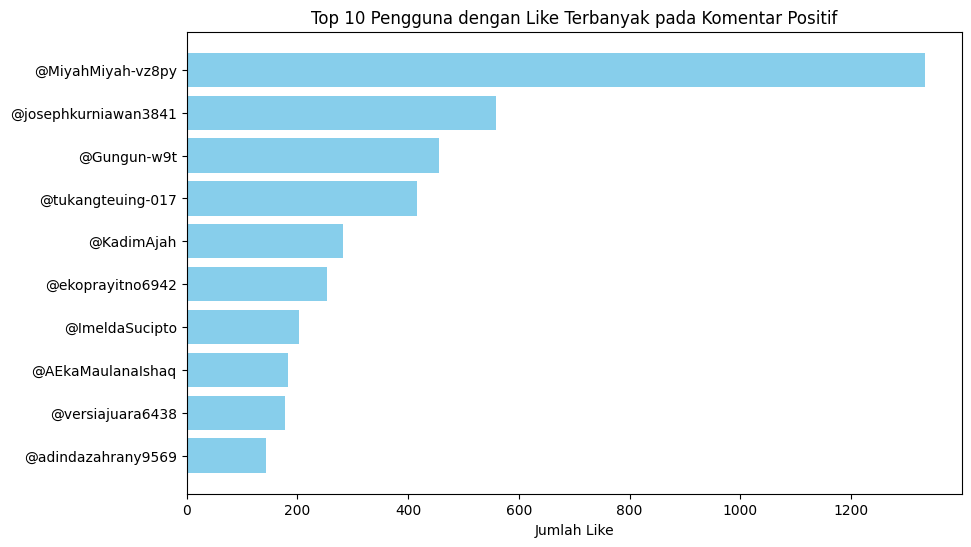

In [ ]:
top_pos_likes = author_summary.sort_values(by="pos_likes", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_pos_likes.index, top_pos_likes["pos_likes"], color="skyblue")
plt.xlabel("Jumlah Like")
plt.title("Top 10 Pengguna dengan Like Terbanyak pada Komentar Positif")
plt.gca().invert_yaxis()
plt.show()

Interpretasi

- **@MiyahMiyah-vz8py** mendominasi secara signifikan dengan lebih dari 1300 like, jauh melampaui pengguna lain. Ini menandakan komentar yang dibuat sangat resonansi dengan publik, mungkin karena bahasa yang menyentuh, dukungan kuat terhadap kebijakan, atau pendekatan naratif yang inspiratif.

- Pengguna seperti **@josephkurniawan3841**,** @Gungun-w9t**, dan **@tukangteuing-017** juga berada di posisi tinggi, menunjukkan bahwa dukungan terhadap sentimen positif cukup tersebar dan tidak hanya dimonopoli satu pihak.

- Semakin ke bawah, jumlah like memang menurun, tetapi akun seperti **@KadimAjah**, **@ekoprayitno6942**, dan **@ImeldaSucipto** tetap mendapatkan atensi publik yang cukup besar. Ini menunjukkan partisipasi aktif dari masyarakat dengan sudut pandang positif yang beragam.

# **Top 10 Pengguna dengan Like Terbanyak pada Komentar Negatif**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20801 (\N{CJK UNIFIED IDEOGRAPH-5141}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


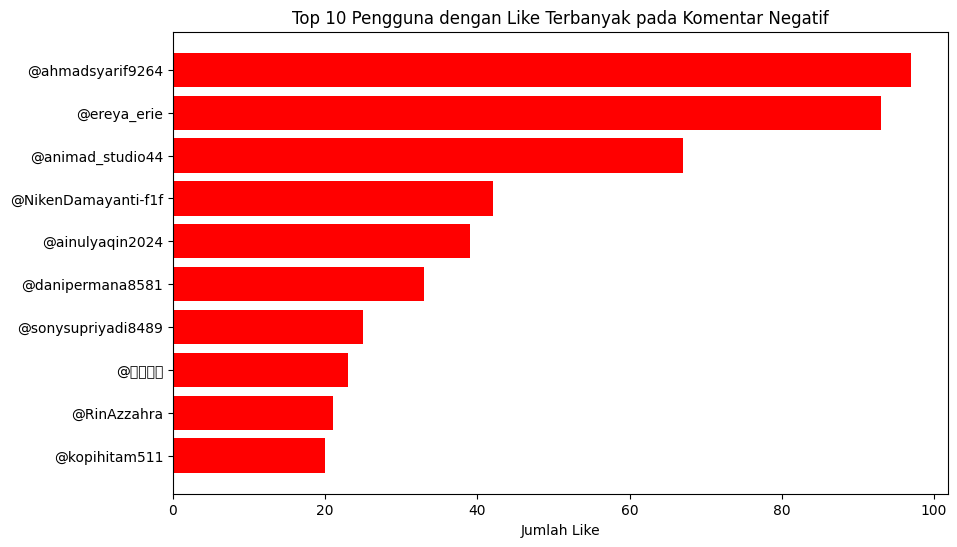

In [ ]:
# Ambil 10 user dengan like negatif terbanyak
top_neg_likes = author_summary.sort_values(by="neg_likes", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_neg_likes.index, top_neg_likes["neg_likes"], color="red")
plt.xlabel("Jumlah Like")
plt.title("Top 10 Pengguna dengan Like Terbanyak pada Komentar Negatif")
plt.gca().invert_yaxis()
plt.show()


Interpretasi

- **@ahmadsyarif9264** dan **@ereya_erie** menempati posisi teratas, masing-masing mendapatkan hampir 100 like, menunjukkan bahwa opini mereka paling dominan di antara kelompok kritis.

- Komentar negatif yang mendapatkan banyak like juga berasal dari akun seperti **@animad_studio44**, **@NikenDamayanti-f1f**, dan **@ainulyaqin2024**, menunjukkan keragaman pengguna yang secara aktif mengkritik.

Sisa pengguna dalam daftar memiliki like yang lebih rendah (<50), namun tetap mencerminkan adanya dukungan terhadap narasi kontra meskipun skalanya lebih kecil dibanding komentar positif (berdasarkan grafik sebelumnya).

- Like pada komentar negatif menandakan adanya kelompok publik yang cukup aktif dalam mengkritik kebijakan tersebut, meskipun secara kuantitatif jumlahnya tidak sebesar kelompok pendukung (seperti terlihat pada grafik sentimen distribusi sebelumnya).

- Komentar negatif kemungkinan besar berkaitan dengan kekhawatiran terhadap etika, agama, hak asasi manusia, atau keadilan sosial, sebagaimana tercermin dari wordcloud dan analisis sebelumnya.

- Tidak ada dominasi akun secara ekstrem seperti pada komentar positif, yang menunjukkan bahwa oposisi tersebar lebih merata dan tidak terpusat pada satu tokoh atau akun tertentu.


# **Top 10 Pengguna dengan Jumlah Komentar Terbanyak**

<ipython-input-57-85ac32bf9350>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10user.index, y=top10user.values, palette='pastel')


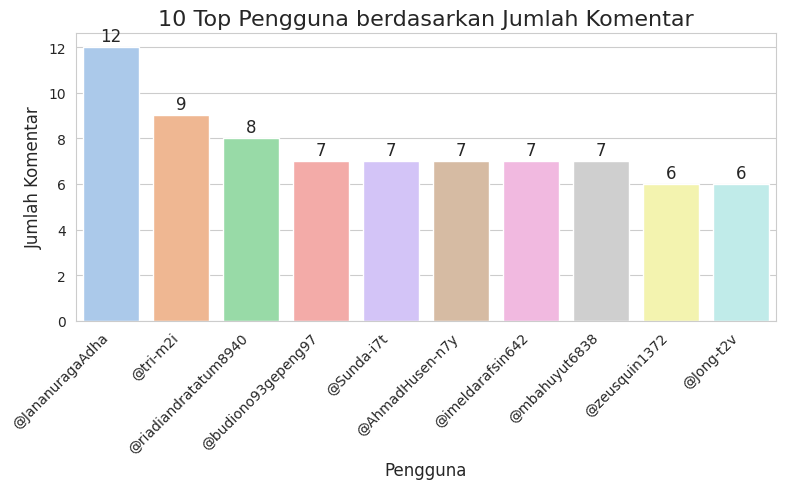

In [ ]:
topuser = data['author'].value_counts()
top10user= topuser.head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top10user.index, y=top10user.values, palette='pastel')

for i, count in enumerate(top10user.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

plt.title('10 Top Pengguna berdasarkan Jumlah Komentar', fontsize=16) # Changed title to reflect comments
plt.xlabel('Pengguna', fontsize=12) # Changed label to Pengguna
plt.ylabel('Jumlah Komentar', fontsize=12) # Changed label to Jumlah Komentar
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretasi

- **@jananuraga84na** menjadi pengguna yang paling aktif, dengan total 12 komentar, menandakan partisipasi yang tinggi dalam percakapan publik.

- Disusul oleh: **@tri.rm2j** (9 komentar), **@faidanfadtratum8940** (8 komentar)

- Empat pengguna lainnya seperti **@budiono393epeng97**, **@Sundari7It**, dan **@AhmadHusenm7y** masing-masing menyumbang 7 komentar.

- Pengguna yang aktif memberikan komentar belum tentu yang paling banyak mendapatkan like atau memiliki komentar paling berpengaruh (positif/negatif), tetapi mereka adalah motor penggerak diskusi.

- Tingkat aktivitas komentar bisa mencerminkan: Minat yang tinggi terhadap isu, ketidakpuasan terhadap kebijakan,atau keinginan untuk membentuk opini publik melalui percakapan yang konsisten.

Beberapa nama di grafik ini tidak muncul di grafik komentar positif/negatif dengan like tertinggi, artinya aktivitas mereka mungkin tidak mendapat banyak perhatian (like), tapi tetap berkontribusi pada volume percakapan.

# **Persebaran Jumlah Data Berdasarkan Tanggal**

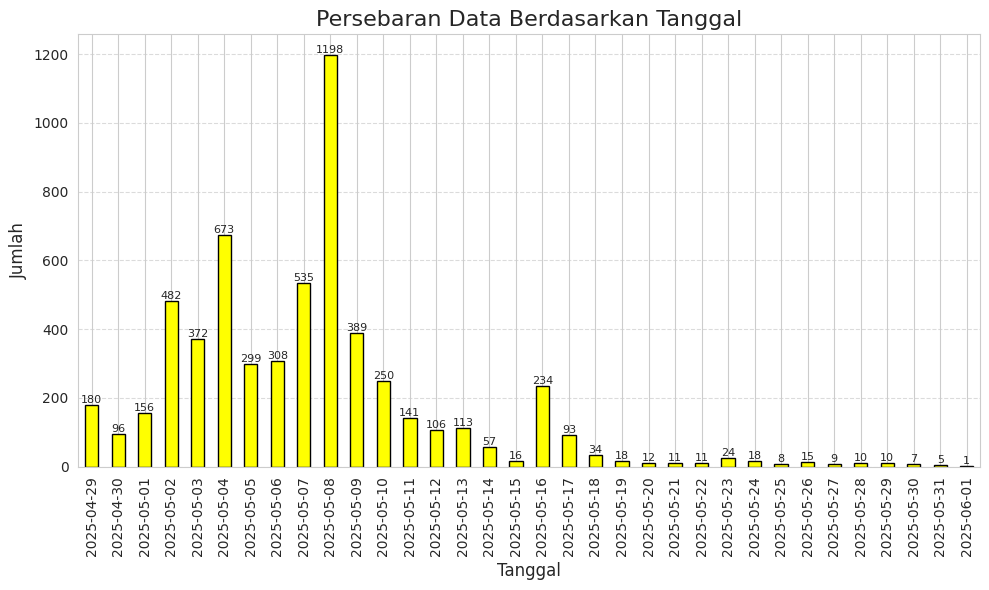

In [ ]:
data['publishedAtt'] = pd.to_datetime(data['publishedAt'], format='ISO8601', errors='coerce')
data['formatted_date'] = data['publishedAtt'].dt.strftime('%d/%m/%Y')
data['formatted_date'] = pd.to_datetime(data['formatted_date'], format='%d/%m/%Y')

# Ekstraksi tanggal untuk persebaran
data['date'] = data['formatted_date'].dt.date

# Hitung jumlah per tanggal
date_counts = data['date'].value_counts().sort_index()

# Plot persebaran
plt.figure(figsize=(10, 6))
ax = date_counts.plot(kind='bar', color='yellow', edgecolor='black')

# Tambahkan angka di atas setiap bar
for i, v in enumerate(date_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=8)

# Sesuaikan tampilan
plt.title('Persebaran Data Berdasarkan Tanggal', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Puncak aktivitas terjadi pada 7 Mei 2025, dengan 1.198 komentar — angka tertinggi sepanjang periode. Ini kemungkinan besar menunjukkan terjadinya peristiwa penting, seperti pernyataan pemerintah, viralnya suatu konten, atau pemberitaan media besar terkait vasektomi.

- Lonjakan signifikan juga terjadi pada:

  5 Mei (673 komentar)

  6 Mei (535 komentar)

  3 Mei (482 komentar)
  
  Ini mengindikasikan bahwa rentang 3–7 Mei adalah periode emas diskusi publik, dengan pertumbuhan masif secara berurutan.

- Setelah 10 Mei, terjadi penurunan drastis dan konsisten dalam jumlah komentar
   Dari ratusan menjadi puluhan, dan bahkan hanya 1 komentar di 1 Juni.

- Ada sedikit rebound pada 17 Mei (234 komentar), mungkin karena munculnya isu turunan atau tanggapan lanjutan dari pihak tertentu.

#**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk
from sklearn.utils import resample

#**Oversampling**

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Drop NaN dulu
data = data.dropna(subset=["labelling"])

# Konversi ke integer
data["labelling"] = data["labelling"].astype(int)

# Drop yang labelling == 0
data = data[data["labelling"] != 0]

# Pisahkan berdasarkan label
positif_df = data[data["labelling"] == 1]
negatif_df = data[data["labelling"] == 3]
netral_df = data[data["labelling"] == 2]

# Hitung jumlah data sentiment netral
netral_count = netral_df.shape[0]

# Lakukan oversampling pada data negatif dan positif untuk menyesuaikan dengan jumlah data netral
negatif_oversampled = resample(negatif_df, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(positif_df, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
df_balanced = pd.concat([netral_df, negatif_oversampled, positif_oversampled])

<ipython-input-62-a95ea1401a44>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')


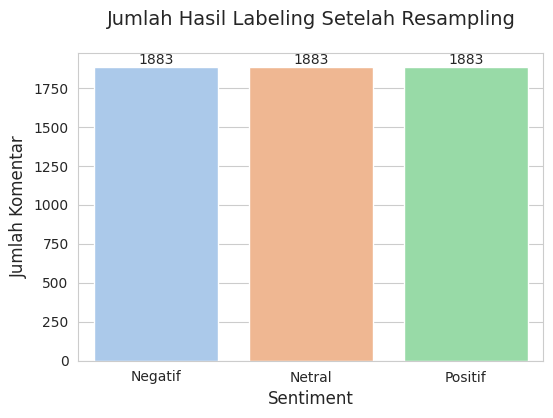

In [ ]:
# Plot barplot untuk jumlah data sentiment yang baru (oversampling)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

Grafik tersebut menunjukkan hasil resampling data sentimen untuk kategori Negatif, Netral, dan Positif, dengan masing-masing kategori memiliki jumlah data yang sama, yaitu 1883 tweet. Proses resampling dilakukan untuk mengatasi ketidakseimbangan jumlah data antar kategori sentimen, sehingga model analisis sentimen yang akan dibangun dapat lebih adil dan akurat dalam memprediksi setiap kategori tanpa bias. Hasil ini mencerminkan keberhasilan metode resampling dalam menciptakan distribusi data yang seimbang.

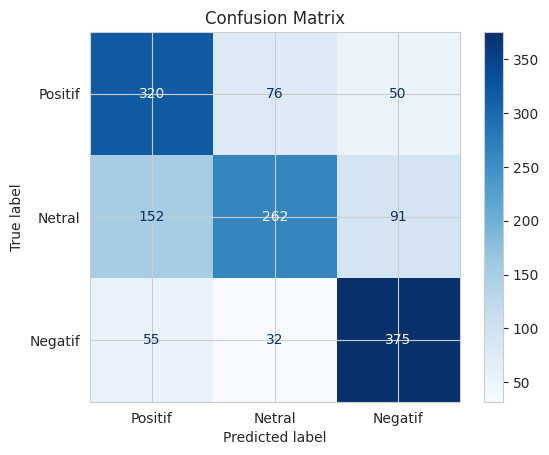

Cross-validation scores: [0.65566038 0.69539551 0.67886659 0.6729634  0.70602125]
Mean CV accuracy: 0.6818


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 3]) # Correct labels to match your data (1=Positif, 2=Netral, 3=Negatif)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Positif', 'Netral', 'Negatif']).plot(cmap='Blues') # Correct display labels
plt.title("Confusion Matrix")
plt.show()

# Tambahkan k-fold cross-validation
from sklearn.model_selection import cross_val_score

# Use the trained SVM model (svm_model) instead of the undefined variable naive_bayes
cv_scores = cross_val_score(svm_model, x_train_vec, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")


In [ ]:
# Pisah data train dan test
x = df_balanced['stemmed'].fillna('').apply(' '.join)
y = df_balanced['labelling'].fillna('')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_vec, y_train)
y_pred = svm_model.predict(x_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])
print("Akurasi Model SVM: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)

Akurasi Model SVM:  0.6772823779193206

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.61      0.72      0.66       446
      Netral       0.71      0.52      0.60       505
     Positif       0.73      0.81      0.77       462

    accuracy                           0.68      1413
   macro avg       0.68      0.68      0.67      1413
weighted avg       0.68      0.68      0.67      1413



Model SVM dengan akurasi sebesar **67,7%**, dapat disimpulkan bahwa model cukup mampu membedakan sentimen komentar publik terhadap isu vasektomi sebagai syarat bansos. Performa terbaik terlihat pada kelas **positif** dengan **f1-score 0.77**, menunjukkan bahwa komentar yang mendukung kebijakan ini cenderung memiliki pola bahasa yang lebih seragam dan eksplisit. Sebaliknya, komentar **negatif** meski memiliki recall tinggi (0.72), memiliki precision lebih rendah (0.61), yang menunjukkan bahwa ekspresi penolakan lebih variatif dan tidak selalu eksplisit, seperti dalam bentuk sindiran atau kritik implisit. Sementara itu, performa model pada kelas **netral** paling lemah (f1-score 0.60), yang mengindikasikan bahwa komentar yang terlihat netral sebenarnya sering kali mengandung sentimen tersirat, seperti skeptisisme atau ketidakpercayaan. Secara keseluruhan, hasil ini mencerminkan bahwa isu kebijakan publik yang sensitif tidak hanya memicu emosi yang jelas,  tetapi juga memunculkan komentar-komentar yang maknanya samar dan sulit dibaca secara otomatis, oleh karena itu analisis sentimen pada kasus ini turut membuka isu terhadap dinamika sosial-politik yang lebih dalam daripada sekadar pro-kontra.
